Downloading...
From: https://drive.google.com/uc?id=15ZGiUTQXFTGwnfz7xsnfx565IdIs6phX
To: /content/horizontal_misalignment.csv
100%|██████████| 17.5M/17.5M [00:00<00:00, 44.5MB/s]


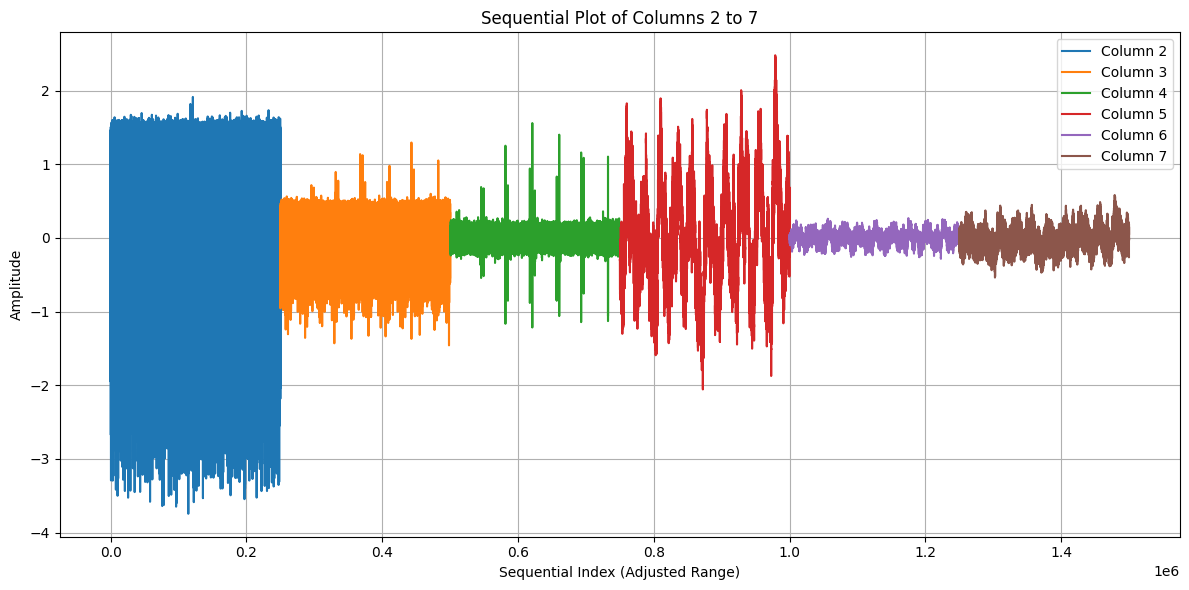

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Step 1: Download the CSV from Google Drive
file_id = "15ZGiUTQXFTGwnfz7xsnfx565IdIs6phX"
file_name = "horizontal_misalignment.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

# Step 2: Load the CSV
df = pd.read_csv(file_name)

# Step 3: Plot columns 2 to 7 sequentially
plt.figure(figsize=(12, 6))

column_labels = [f'Column {i}' for i in range(2, 8)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

start = 0
for i in range(1, 7):  # Columns 2 to 7 = index 1 to 6 (0-based)
    col_data = df.iloc[:, i]
    end = start + len(col_data)
    plt.plot(np.arange(start, end), col_data, label=column_labels[i-1], color=colors[i-1])
    start = end

plt.title("Sequential Plot of Columns 2 to 7")
plt.xlabel("Sequential Index (Adjusted Range)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import gdown

# List of file IDs (replace these with your actual 10 file IDs)
file_ids = {
    'normal': '1KOLqgmA6483QuRjio0QBdhGql6FcsIqo',
    'fault_HRM': '15ZGiUTQXFTGwnfz7xsnfx565IdIs6phX',
    'fault_VRM': '1G8lJ2ZsKV1LYmHG45p-oxOdhrz0vXzTo',
    'fault_UNB': '1dEk-q2ZmJHU-yTyXeIPRcGr3mr061ZD8',
    'fault_OHB': '1brW1WXlSfgR-z30sTtYAM-jGhN7wDYke',
    'fault_OHC': '1DCuT7qW98NqAZ2kscd4tzcZdd58FWtvX',
    'fault_OHO': '1ngJ4wXpe3p3wxICfgXWnKrEXVEkg0Wgo',
    'fault_UHB': '1J50qoM3eRh6W6hfewKGM9kptwxX27bH3',
    'fault_UHC': '1WnAH6DYpjFIg-P78cJf3tKgyRXV05YCm',
    'fault_UHO': '1blCHCZzBSCyIpbXxOjSMbsV8w_8ByME8',
}

# Dictionary to hold each class's 5-column DataFrame
class_data = {}

# Loop through and process each file
for class_name, file_id in file_ids.items():
    file_name = f"{class_name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

   # Load the CSV with no header row
    df = pd.read_csv(file_name, header=None)

    # Select columns 2–5 and 7 (index 1,2,3,4,6)
    selected_df = df.iloc[:, [1, 2, 3, 4, 6]].copy()

    # Add a label column
    selected_df['label'] = class_name

    # Store in the dictionary
    class_data[class_name] = selected_df

# Step 4 (Optional): Combine all class DataFrames into one big DataFrame
all_data = pd.concat(class_data.values(), ignore_index=True)

# Step 5: Inspect the final DataFrame
print("Final data shape:", all_data.shape)  # Should be (2500000, 6)
print(all_data.head())

Downloading...
From: https://drive.google.com/uc?id=1KOLqgmA6483QuRjio0QBdhGql6FcsIqo
To: /content/normal.csv
100%|██████████| 17.6M/17.6M [00:00<00:00, 74.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=15ZGiUTQXFTGwnfz7xsnfx565IdIs6phX
To: /content/fault_HRM.csv
100%|██████████| 17.5M/17.5M [00:00<00:00, 61.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G8lJ2ZsKV1LYmHG45p-oxOdhrz0vXzTo
To: /content/fault_VRM.csv
100%|██████████| 17.4M/17.4M [00:00<00:00, 51.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dEk-q2ZmJHU-yTyXeIPRcGr3mr061ZD8
To: /content/fault_UNB.csv
100%|██████████| 17.2M/17.2M [00:00<00:00, 78.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1brW1WXlSfgR-z30sTtYAM-jGhN7wDYke
To: /content/fault_OHB.csv
100%|██████████| 16.2M/16.2M [00:00<00:00, 17.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DCuT7qW98NqAZ2kscd4tzcZdd58FWtvX
To: /content/fault_OHC.csv
100%|██████████| 17.5M/17.5M [00:00<00:00, 90.3MB/s]
Downloa

Final data shape: (2500000, 6)
         1         2         3        4         6   label
0 -1.70450 -0.076488 -0.051497 -0.56721 -0.031897  normal
1  1.72010  0.273950  0.021210 -0.45291  0.069768  normal
2 -1.60530 -0.253730 -0.076687 -0.57488 -0.049242  normal
3  1.28430  0.372430  0.055843 -0.45892  0.054420  normal
4 -0.84995 -0.234240 -0.060778 -0.55874 -0.035808  normal


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, entropy
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Rename columns
all_data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'label']

# Step 1: Define sliding window feature extraction
def extract_features(raw_df, window_size=5000):
    num_windows = raw_df.shape[0] // window_size
    feature_frames = []

    for i in range(num_windows):
        window = raw_df.iloc[i * window_size : (i + 1) * window_size]
        features = {}
        features['Label'] = window['label'].iloc[0]

        for j, col in enumerate(['x1', 'x2', 'x3', 'x4', 'x5'], start=1):
            signal = window[col].values
            rms = np.sqrt(np.mean(signal**2))
            peak = np.max(np.abs(signal))
            crest_factor = peak / rms if rms != 0 else 0
            std_dev = np.std(signal, ddof=1)
            skewness_value = skew(signal)
            mean_value = np.mean(signal)
            kurt_val = kurtosis(signal)
            zero_cross = ((signal[:-1] * signal[1:]) < 0).sum()
            ent = entropy(np.histogram(signal, bins=50, density=True)[0] + 1e-12)

            features[f'RMS_{j}'] = rms
            features[f'Peak_{j}'] = peak
            features[f'CrestFactor_{j}'] = crest_factor
            features[f'StdDev_{j}'] = std_dev
            features[f'Skewness_{j}'] = skewness_value
            features[f'Mean_{j}'] = mean_value
            features[f'Kurtosis_{j}'] = kurt_val
            features[f'ZeroCrossingRate_{j}'] = zero_cross
            features[f'TimeEntropy_{j}'] = ent

            spectrum = np.abs(fft(signal))[:window_size // 2]
            freqs = np.fft.fftfreq(len(signal), d=1)[:window_size // 2]

            band_power = np.sum(spectrum**2)
            resonant_freq = np.argmax(spectrum)
            threshold = np.max(spectrum) * (10 ** (-3 / 20))
            indices = np.where(spectrum >= threshold)[0]
            bandwidth = indices[-1] - indices[0] if len(indices) > 0 else 0

            centroid = np.sum(freqs * spectrum) / (np.sum(spectrum) + 1e-12)
            flatness = np.exp(np.mean(np.log(spectrum + 1e-12))) / (np.mean(spectrum) + 1e-12)
            spectral_skew = np.sum((freqs - centroid)**3 * spectrum) / ((np.std(spectrum) ** 3) * np.sum(spectrum) + 1e-12)
            cumulative_energy = np.cumsum(spectrum)
            rolloff = freqs[np.where(cumulative_energy >= 0.85 * cumulative_energy[-1])[0][0]] if cumulative_energy[-1] > 0 else 0

            features[f'BandPower_{j}'] = band_power
            features[f'ResonantFreq_{j}'] = resonant_freq
            features[f'Bandwidth_{j}'] = bandwidth
            features[f'SpectralCentroid_{j}'] = centroid
            features[f'SpectralFlatness_{j}'] = flatness
            features[f'SpectralSkewness_{j}'] = spectral_skew
            features[f'SpectralRolloff_{j}'] = rolloff

        feature_frames.append(pd.DataFrame([features]))

    return pd.concat(feature_frames, ignore_index=True)

# Step 2: Extract features from full signal before splitting
features_df = extract_features(all_data)

# Step 3: Split feature DataFrame into train and test
train_features_df, test_features_df = train_test_split(
    features_df, test_size=0.2, stratify=features_df['Label'], random_state=42
)

# Step 4: Normalize based on training features only
scaler_feat = StandardScaler()
X_train = train_features_df.drop(columns=['Label'])
y_train = train_features_df['Label']
X_test = test_features_df.drop(columns=['Label'])
y_test = test_features_df['Label']

X_train_scaled = scaler_feat.fit_transform(X_train)
X_test_scaled = scaler_feat.transform(X_test)

# Step 5: Rebuild normalized DataFrames
train_features_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_features_df['Label'] = y_train.reset_index(drop=True)

test_features_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_features_df['Label'] = y_test.reset_index(drop=True)

# Final check
print("✅ Normalized Train Features Shape:", train_features_df.shape)
print("✅ Normalized Test Features Shape:", test_features_df.shape)


✅ Normalized Train Features Shape: (400, 81)
✅ Normalized Test Features Shape: (100, 81)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9195
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 80
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

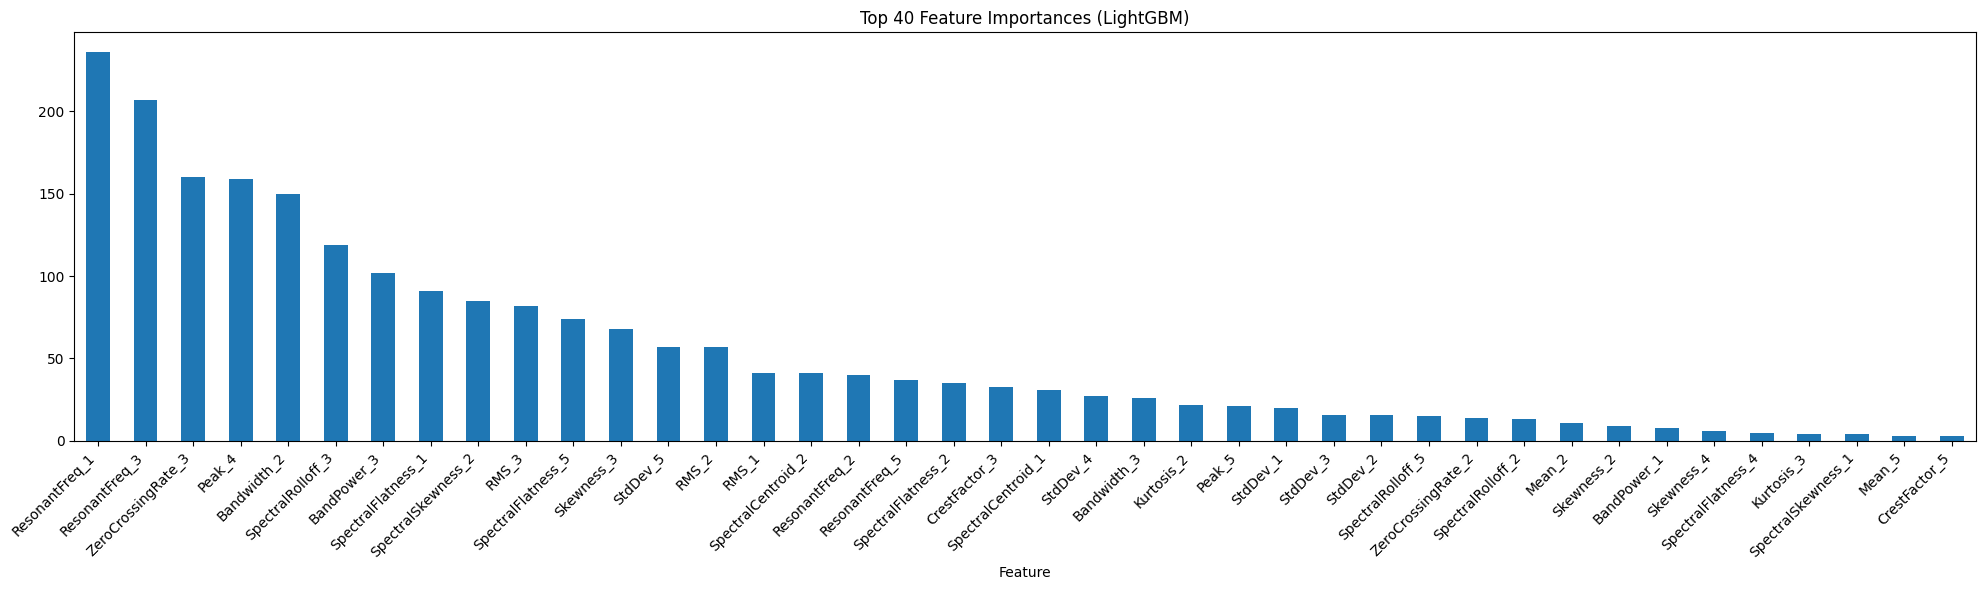

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

# Train LightGBM model
X_train_lgb = train_features_df.drop(columns=['Label'])
y_train_lgb = train_features_df['Label']

model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    min_child_samples=10,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    max_depth=7,
    random_state=42
)
model.fit(X_train_lgb, y_train_lgb)

# Get and sort importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train_lgb.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with readable labels
top_n = 40  # or all
fig, ax = plt.subplots(figsize=(20, 6))  # This actually works now
importance_df.head(top_n).plot.bar(x='Feature', y='Importance', ax=ax, legend=False)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Feature Importances (LightGBM)')
plt.tight_layout()
plt.show()


🔝 Top 10 features ranked by Separation Index (Train data):
                        SI
Mean_4              0.8750
CrestFactor_5       0.8700
Mean_1              0.8325
Mean_3              0.8325
Mean_5              0.8300
Skewness_4          0.8200
Mean_2              0.8200
TimeEntropy_5       0.8100
SpectralFlatness_4  0.8100
TimeEntropy_4       0.8075


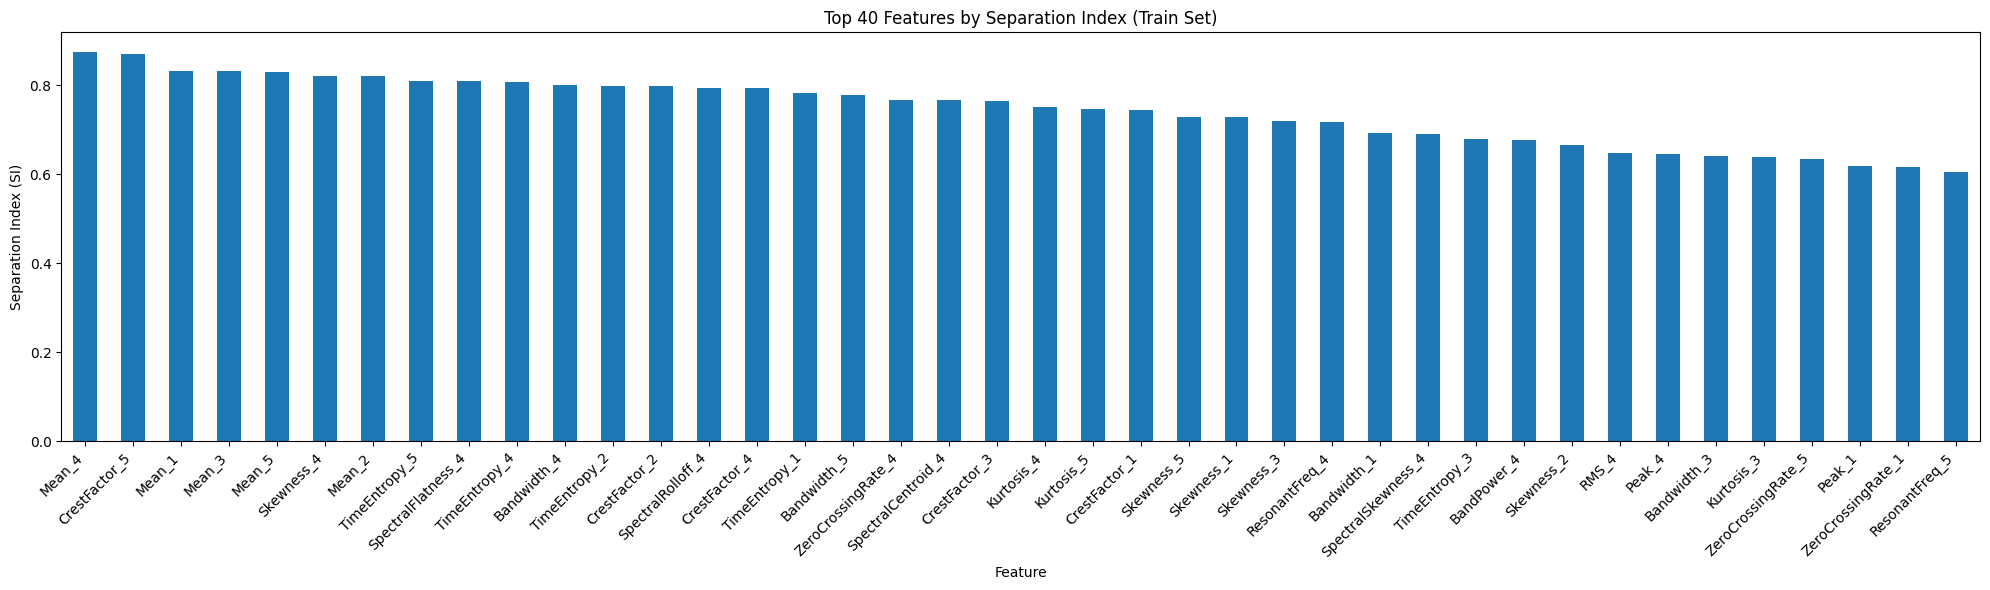

In [ ]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Separate features and labels from training set
X_train_si = train_features_df.drop(columns=['Label'])
y_train_si = train_features_df['Label']

# Step 2: Function to compute SI for a single feature
def compute_si(X, y):
    distances = pairwise_distances(X)  # pairwise Euclidean distances
    np.fill_diagonal(distances, np.inf)  # avoid self-comparison
    nearest_indices = np.argmin(distances, axis=1)
    labels = y.to_numpy()
    different_class = (labels != labels[nearest_indices]).astype(int)
    si_value = np.mean(different_class)
    return si_value

# Step 3: Compute SI for all features
si_scores = {}
for col in X_train_si.columns:
    si_scores[col] = compute_si(X_train_si[[col]], y_train_si)

# Step 4: Convert to DataFrame and sort
si_df = pd.DataFrame.from_dict(si_scores, orient='index', columns=['SI'])
si_df = si_df.sort_values(by='SI', ascending=False)

# Step 5: Show top 10 features
print("🔝 Top 10 features ranked by Separation Index (Train data):")
print(si_df.head(10))

# Step 6: Plot top 40 (or all) features
top_n = 40
fig, ax = plt.subplots(figsize=(20, 6))
si_df.head(top_n).plot(kind='bar', ax=ax, title=f'Top {top_n} Features by Separation Index (Train Set)', legend=False)

plt.ylabel("Separation Index (SI)")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Get top 40 features from LightGBM importance (already from train data)
top40_lgbm_features = importance_df.sort_values('Importance', ascending=False).head(40)
lgbm_feature_names = top40_lgbm_features['Feature'].tolist()
print("🔹 Top 40 features by LightGBM (feature names):")
print(lgbm_feature_names)

# Get top 40 features from SI (already from train data)
top40_si_features = si_df.sort_values('SI', ascending=False).head(40)
si_feature_names = top40_si_features.index.values.tolist()
print("\n🔹 Top 40 features by Separation Index (feature names only):")
print(si_feature_names)

# Intersection of top features
shared_top_features = list(set(lgbm_feature_names) & set(si_feature_names))
print(f"\n✅ Number of shared features: {len(shared_top_features)}")
print("🔁 Shared top features:")
print(shared_top_features)

# Subset only the selected features from train set
X_selected = train_features_df[shared_top_features]
y = train_features_df['Label']

# Combine selected features and labels into one DataFrame
df_selected = X_selected.copy()
df_selected['Label'] = y.values

# Final check
print("✅ Final selected feature DataFrame shape:", df_selected.shape)
print(df_selected.head())


🔹 Top 40 features by LightGBM (feature names):
['ResonantFreq_1', 'ResonantFreq_3', 'ZeroCrossingRate_3', 'Peak_4', 'Bandwidth_2', 'SpectralRolloff_3', 'BandPower_3', 'SpectralFlatness_1', 'SpectralSkewness_2', 'RMS_3', 'SpectralFlatness_5', 'Skewness_3', 'StdDev_5', 'RMS_2', 'RMS_1', 'SpectralCentroid_2', 'ResonantFreq_2', 'ResonantFreq_5', 'SpectralFlatness_2', 'CrestFactor_3', 'SpectralCentroid_1', 'StdDev_4', 'Bandwidth_3', 'Kurtosis_2', 'Peak_5', 'StdDev_1', 'StdDev_3', 'StdDev_2', 'SpectralRolloff_5', 'ZeroCrossingRate_2', 'SpectralRolloff_2', 'Mean_2', 'Skewness_2', 'BandPower_1', 'Skewness_4', 'SpectralFlatness_4', 'Kurtosis_3', 'SpectralSkewness_1', 'Mean_5', 'CrestFactor_5']

🔹 Top 40 features by Separation Index (feature names only):
['Mean_4', 'CrestFactor_5', 'Mean_1', 'Mean_3', 'Mean_5', 'Skewness_4', 'Mean_2', 'TimeEntropy_5', 'SpectralFlatness_4', 'TimeEntropy_4', 'Bandwidth_4', 'TimeEntropy_2', 'CrestFactor_2', 'SpectralRolloff_4', 'CrestFactor_4', 'TimeEntropy_1', 'Ba

✅ Classifier Accuracy: 0.9100

📋 Classification Report:
              precision    recall  f1-score   support

   fault_HRM       0.82      0.90      0.86        10
   fault_OHB       1.00      1.00      1.00        10
   fault_OHC       0.89      0.80      0.84        10
   fault_OHO       0.89      0.80      0.84        10
   fault_UHB       1.00      1.00      1.00        10
   fault_UHC       1.00      0.90      0.95        10
   fault_UHO       0.91      1.00      0.95        10
   fault_UNB       0.82      0.90      0.86        10
   fault_VRM       1.00      0.80      0.89        10
      normal       0.83      1.00      0.91        10

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



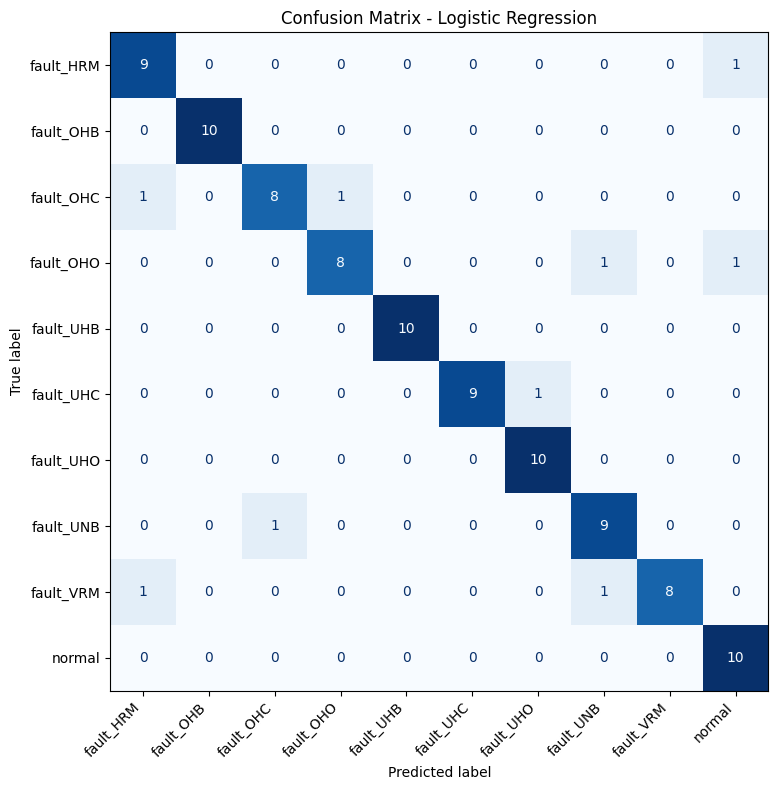

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train = train_features_df[shared_top_features]
y_train = train_features_df['Label']
X_test = test_features_df[shared_top_features]
y_test = test_features_df['Label']

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Classifier Accuracy: {accuracy:.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', ax=ax, colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

# Label mapping: fine-grained → main 5-class
label_mapping = {
    'fault_UHB': 'underhang', 'fault_UHC': 'underhang', 'fault_UHO': 'underhang',
    'fault_OHB': 'overhang',  'fault_OHC': 'overhang',  'fault_OHO': 'overhang',
    'fault_VRM': 'misalignment', 'fault_HRM': 'misalignment',
    'fault_UNB': 'imbalance',
    'normal': 'normal'
}

# Downsampling function with fixed sample count per class
def downsample_to_5classes(df, feature_names, samples_per_class=40):
    df = df[df['Label'].isin(label_mapping.keys())].copy()
    df['MainLabel'] = df['Label'].map(label_mapping)

    balanced_parts = []
    for label in ['normal', 'imbalance', 'misalignment', 'overhang', 'underhang']:
        subset = df[df['MainLabel'] == label]
        if len(subset) >= samples_per_class:
            downsampled = resample(subset, replace=False, n_samples=samples_per_class, random_state=42)
            balanced_parts.append(downsampled)
        else:
            raise ValueError(f"❌ Not enough samples for class '{label}': only {len(subset)} available.")

    df_balanced = pd.concat(balanced_parts).reset_index(drop=True)
    df_balanced_final = df_balanced[feature_names + ['MainLabel']].copy()
    df_balanced_final = df_balanced_final.rename(columns={'MainLabel': 'Label'})
    return df_balanced_final

# Apply to train and test separately
train_5class_df = downsample_to_5classes(train_features_df, shared_top_features, samples_per_class=40)
test_5class_df  = downsample_to_5classes(test_features_df, shared_top_features, samples_per_class=10)

# Final check
print("✅ Train 5-class DataFrame shape:", train_5class_df.shape)
print("✅ Test 5-class DataFrame shape:", test_5class_df.shape)

print("\n📊 Train class distribution:")
print(train_5class_df['Label'].value_counts())

print("\n📊 Test class distribution:")
print(test_5class_df['Label'].value_counts())


✅ Train 5-class DataFrame shape: (200, 13)
✅ Test 5-class DataFrame shape: (50, 13)

📊 Train class distribution:
Label
normal          40
imbalance       40
misalignment    40
overhang        40
underhang       40
Name: count, dtype: int64

📊 Test class distribution:
Label
normal          10
imbalance       10
misalignment    10
overhang        10
underhang       10
Name: count, dtype: int64


✅ Classification Report:
              precision    recall  f1-score   support

   imbalance       0.75      0.90      0.82        10
misalignment       0.80      0.80      0.80        10
      normal       0.91      1.00      0.95        10
    overhang       0.86      0.60      0.71        10
   underhang       1.00      1.00      1.00        10

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



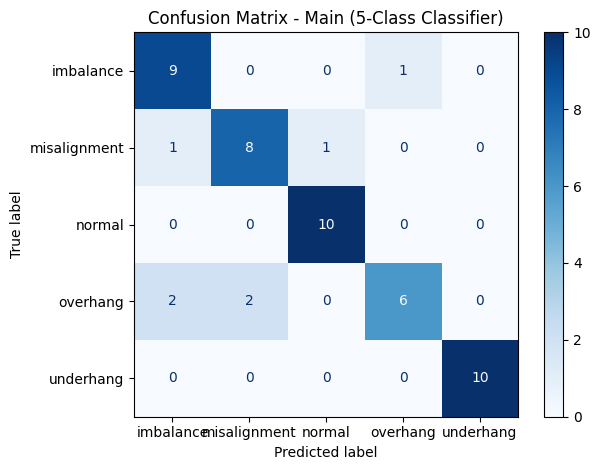

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Separate features and labels for training
X_train = train_5class_df.drop(columns=['Label'])
y_train = train_5class_df['Label']

# Step 2: Separate features and labels for testing
X_test = test_5class_df.drop(columns=['Label'])
y_test = test_5class_df['Label']

# Step 3: Train Logistic Regression model
Main = LogisticRegression(max_iter=1000)
Main.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = Main.predict(X_test)

# Step 5: Evaluate and display classification report
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=Main.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Main.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Main (5-Class Classifier)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

# Step 1: Define label mapping for misalignment subclasses
misalignment_map = {
    'fault_VRM': 'vertical',
    'fault_HRM': 'horizontal'
}

# Step 2: Filter and map train data
train_mis = train_features_df[train_features_df['Label'].isin(misalignment_map.keys())].copy()
train_mis['SubLabel'] = train_mis['Label'].map(misalignment_map)

# Step 3: Filter and map test data
test_mis = test_features_df[test_features_df['Label'].isin(misalignment_map.keys())].copy()
test_mis['SubLabel'] = test_mis['Label'].map(misalignment_map)

# Step 4: Keep only selected features + new label
train_mis_df = train_mis[shared_top_features + ['SubLabel']].copy()
test_mis_df = test_mis[shared_top_features + ['SubLabel']].copy()

# Step 5: Rename label column for consistency
train_mis_df = train_mis_df.rename(columns={'SubLabel': 'Label'})
test_mis_df = test_mis_df.rename(columns={'SubLabel': 'Label'})

# Final check
print("✅ Train misalignment subclass shape:", train_mis_df.shape)
print("✅ Test misalignment subclass shape:", test_mis_df.shape)
print("\n📊 Train class distribution:")
print(train_mis_df['Label'].value_counts())
print("\n📊 Test class distribution:")
print(test_mis_df['Label'].value_counts())


✅ Train misalignment subclass shape: (80, 13)
✅ Test misalignment subclass shape: (20, 13)

📊 Train class distribution:
Label
vertical      40
horizontal    40
Name: count, dtype: int64

📊 Test class distribution:
Label
horizontal    10
vertical      10
Name: count, dtype: int64


✅ Classification Report (misalignment subclasses):
              precision    recall  f1-score   support

  horizontal       1.00      1.00      1.00        10
    vertical       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



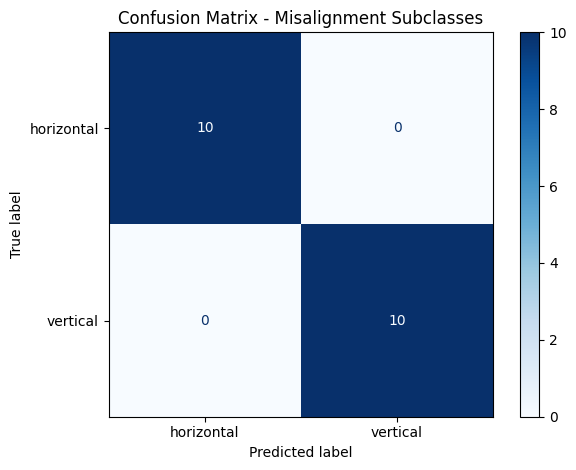

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Separate features and labels from train set
X_train = train_mis_df.drop(columns=['Label'])
y_train = train_mis_df['Label']

# Step 2: Separate features and labels from test set
X_test = test_mis_df.drop(columns=['Label'])
y_test = test_mis_df['Label']

# Step 3: Train logistic regression model
misalignment = LogisticRegression(max_iter=1000)
misalignment.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = misalignment.predict(X_test)

# Step 5: Evaluate performance
print("✅ Classification Report (misalignment subclasses):")
print(classification_report(y_test, y_pred))

# Step 6: Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=misalignment.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=misalignment.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Misalignment Subclasses")
plt.tight_layout()
plt.show()


In [ ]:
# Define label mapping for overhang sub-classes
overhang_map = {
    'fault_OHB': 'ball',
    'fault_OHC': 'cage',
    'fault_OHO': 'outerrace'
}

# Filter and map train data
train_over = train_features_df[train_features_df['Label'].isin(overhang_map.keys())].copy()
train_over['SubLabel'] = train_over['Label'].map(overhang_map)

# Filter and map test data
test_over = test_features_df[test_features_df['Label'].isin(overhang_map.keys())].copy()
test_over['SubLabel'] = test_over['Label'].map(overhang_map)

# Keep only selected features + mapped label
train_overhang_df = train_over[shared_top_features + ['SubLabel']].copy()
test_overhang_df = test_over[shared_top_features + ['SubLabel']].copy()

# Rename label column
train_overhang_df = train_overhang_df.rename(columns={'SubLabel': 'Label'})
test_overhang_df = test_overhang_df.rename(columns={'SubLabel': 'Label'})

# Display class distributions
print("✅ Train overhang DataFrame shape:", train_overhang_df.shape)
print("✅ Test overhang DataFrame shape:", test_overhang_df.shape)

print("\n📊 Train class distribution:")
print(train_overhang_df['Label'].value_counts())

print("\n📊 Test class distribution:")
print(test_overhang_df['Label'].value_counts())


✅ Train overhang DataFrame shape: (120, 13)
✅ Test overhang DataFrame shape: (30, 13)

📊 Train class distribution:
Label
ball         40
outerrace    40
cage         40
Name: count, dtype: int64

📊 Test class distribution:
Label
outerrace    10
ball         10
cage         10
Name: count, dtype: int64


✅ Classification Report (Overhang subclasses):
              precision    recall  f1-score   support

        ball       1.00      1.00      1.00        10
        cage       1.00      0.90      0.95        10
   outerrace       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



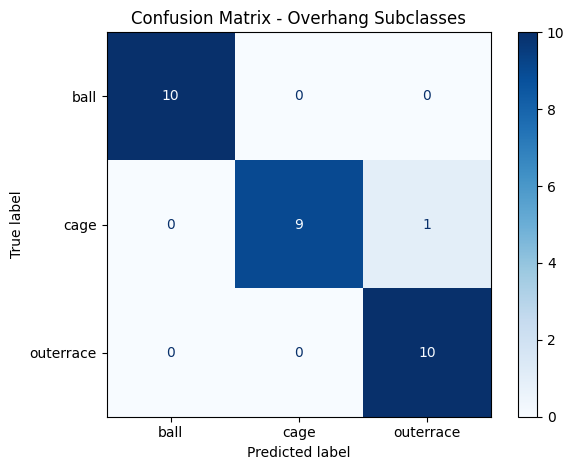

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Separate features and labels
X_train = train_overhang_df.drop(columns=['Label'])
y_train = train_overhang_df['Label']

X_test = test_overhang_df.drop(columns=['Label'])
y_test = test_overhang_df['Label']

# Step 2: Train logistic regression model
overhang = LogisticRegression(max_iter=1000)
overhang.fit(X_train, y_train)

# Step 3: Predict
y_pred = overhang.predict(X_test)

# Step 4: Evaluate performance
print("✅ Classification Report (Overhang subclasses):")
print(classification_report(y_test, y_pred))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=overhang.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=overhang.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Overhang Subclasses")
plt.tight_layout()
plt.show()


In [ ]:
# Define label mapping for underhang sub-classes
underhang_map = {
    'fault_UHB': 'ball',
    'fault_UHC': 'cage',
    'fault_UHO': 'outerrace'
}

# Filter and map train data
train_under = train_features_df[train_features_df['Label'].isin(underhang_map.keys())].copy()
train_under['SubLabel'] = train_under['Label'].map(underhang_map)

# Filter and map test data
test_under = test_features_df[test_features_df['Label'].isin(underhang_map.keys())].copy()
test_under['SubLabel'] = test_under['Label'].map(underhang_map)

# Keep only selected features + new label
train_underhang_df = train_under[shared_top_features + ['SubLabel']].copy()
test_underhang_df = test_under[shared_top_features + ['SubLabel']].copy()

# Rename label column
train_underhang_df = train_underhang_df.rename(columns={'SubLabel': 'Label'})
test_underhang_df = test_underhang_df.rename(columns={'SubLabel': 'Label'})

# Check class distribution
print("✅ Train underhang DataFrame shape:", train_underhang_df.shape)
print("✅ Test underhang DataFrame shape:", test_underhang_df.shape)

print("\n📊 Train class distribution:")
print(train_underhang_df['Label'].value_counts())

print("\n📊 Test class distribution:")
print(test_underhang_df['Label'].value_counts())


✅ Train underhang DataFrame shape: (120, 13)
✅ Test underhang DataFrame shape: (30, 13)

📊 Train class distribution:
Label
outerrace    40
cage         40
ball         40
Name: count, dtype: int64

📊 Test class distribution:
Label
outerrace    10
cage         10
ball         10
Name: count, dtype: int64


✅ Classification Report (Underhang subclasses):
              precision    recall  f1-score   support

        ball       1.00      1.00      1.00        10
        cage       1.00      0.90      0.95        10
   outerrace       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



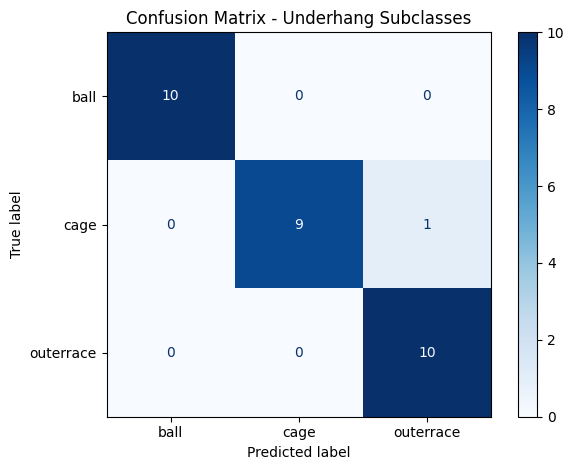

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Separate features and labels
X_train = train_underhang_df.drop(columns=['Label'])
y_train = train_underhang_df['Label']

X_test = test_underhang_df.drop(columns=['Label'])
y_test = test_underhang_df['Label']

# Step 2: Train logistic regression model
underhang = LogisticRegression(max_iter=1000)
underhang.fit(X_train, y_train)

# Step 3: Predict
y_pred = underhang.predict(X_test)

# Step 4: Evaluate performance
print("✅ Classification Report (Underhang subclasses):")
print(classification_report(y_test, y_pred))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=underhang.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=underhang.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Underhang Subclasses")
plt.tight_layout()
plt.show()


In [ ]:
def hierarchial_classifier(df_input):
    """
    Applies hierarchical classification and ensures all outputs are from the 10 main classes:
    ['fault_VRM', 'fault_HRM', 'fault_OHB', 'fault_OHC', 'fault_OHO',
     'fault_UHB', 'fault_UHC', 'fault_UHO', 'fault_UNB', 'normal']
    """

    main_preds = Main.predict(df_input[shared_top_features])
    final_labels = []

    for i, main_class in enumerate(main_preds):
        sample = df_input[shared_top_features].iloc[[i]]

        if main_class == 'misalignment':
            sub_pred = misalignment.predict(sample)[0]
            if sub_pred == 'vertical':
                final_labels.append('fault_VRM')
            elif sub_pred == 'horizontal':
                final_labels.append('fault_HRM')
            else:
                final_labels.append('misalignment')  # در صورت بروز خطا برای دیباگ

        elif main_class == 'overhang':
            sub_pred = overhang.predict(sample)[0]
            if sub_pred == 'ball':
                final_labels.append('fault_OHB')
            elif sub_pred == 'cage':
                final_labels.append('fault_OHC')
            elif sub_pred == 'outerrace':
                final_labels.append('fault_OHO')
            else:
                final_labels.append('overhang')

        elif main_class == 'underhang':
            sub_pred = underhang.predict(sample)[0]
            if sub_pred == 'ball':
                final_labels.append('fault_UHB')
            elif sub_pred == 'cage':
                final_labels.append('fault_UHC')
            elif sub_pred == 'outerrace':
                final_labels.append('fault_UHO')
            else:
                final_labels.append('underhang')

        else:
            # 'normal' or 'imbalance'
            if main_class == 'imbalance':
                final_labels.append('fault_UNB')
            else:
                final_labels.append('normal')

    df_output = df_input.copy()
    df_output['FinalLabel'] = final_labels
    return df_output


In [ ]:
def flat_classifier_predict(df_input):
    """
    Applies the flat 9-class classifier (clf) to the input feature DataFrame.

    Parameters:
        df_input (pd.DataFrame): DataFrame containing selected features and the true 'Label'.

    Returns:
        pd.DataFrame: The same DataFrame with an added 'FlatLabel' column.
    """
    # Only keep features for prediction
    X_input = df_input[shared_top_features].copy()

    # Predict using trained flat classifier
    flat_preds = clf.predict(X_input)

    # Add prediction column
    output_df = df_input.copy()
    output_df['FlatLabel'] = flat_preds

    return output_df


In [ ]:
import pandas as pd
import gdown

# List of file IDs (replace these with your actual 10 file IDs)
file_ids = {
    'normal': '1syhv8wTumVXoAcCL_910Lhp2HsQ_yhl7',
    'fault_HRM': '18i6bVoe_VKvTlnecfBGRvH786fxXIJ8V',
    'fault_VRM': '160Y9dbHDUl00SNg8Yz8RSlkm_wBeeSjy',
    'fault_UNB': '1TzmFqaIJnHrzVvdViFufK4hzoIq7AtkK',
    'fault_OHB': '1rgfa7fdh8auVunjT3Gtu_bNk8RxMVWmG',
    'fault_OHC': '1KscfjDMdBu8NAldd3Wlsv9xfKuNMniA2',
    'fault_OHO': '1xRGhQdBuZaK4s6x6D4N7UxK3vhP3IKq_',
    'fault_UHB': '1PxRg6y4-wpy9Ozb2F3ejrY4sJRfYIUFd',
    'fault_UHC': '1J9ID-F-cIbRpYia1LybIMiDR0kn3yBDT',
    'fault_UHO': '19rGzXDkeLP0HqCvZZ6h4TuwwEIZ3kztS',
}

# Dictionary to hold each class's 5-column DataFrame
class_data = {}

# Loop through and process each file
for class_name, file_id in file_ids.items():
    file_name = f"{class_name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

   # Load the CSV with no header row
    df = pd.read_csv(file_name, header=None)

    # Select columns 2–5 and 7 (index 1,2,3,4,6)
    selected_df = df.iloc[:, [1, 2, 3, 4, 6]].copy()

    # Add a label column
    selected_df['label'] = class_name

    # Store in the dictionary
    class_data[class_name] = selected_df

# Step 4 (Optional): Combine all class DataFrames into one big DataFrame
all_data = pd.concat(class_data.values(), ignore_index=True)

# Step 5: Inspect the final DataFrame
print("Final data shape:", all_data.shape)  # Should be (2500000, 6)
print(all_data.head())

Downloading...
From: https://drive.google.com/uc?id=1syhv8wTumVXoAcCL_910Lhp2HsQ_yhl7
To: /content/normal.csv
100%|██████████| 17.4M/17.4M [00:00<00:00, 57.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=18i6bVoe_VKvTlnecfBGRvH786fxXIJ8V
To: /content/fault_HRM.csv
100%|██████████| 17.3M/17.3M [00:00<00:00, 114MB/s] 
Downloading...
From: https://drive.google.com/uc?id=160Y9dbHDUl00SNg8Yz8RSlkm_wBeeSjy
To: /content/fault_VRM.csv
100%|██████████| 17.4M/17.4M [00:01<00:00, 13.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TzmFqaIJnHrzVvdViFufK4hzoIq7AtkK
To: /content/fault_UNB.csv
100%|██████████| 17.0M/17.0M [00:00<00:00, 63.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rgfa7fdh8auVunjT3Gtu_bNk8RxMVWmG
To: /content/fault_OHB.csv
100%|██████████| 16.1M/16.1M [00:00<00:00, 165MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KscfjDMdBu8NAldd3Wlsv9xfKuNMniA2
To: /content/fault_OHC.csv
100%|██████████| 17.4M/17.4M [00:00<00:00, 95.7MB/s]
Download

Final data shape: (2500000, 6)
          1         2         3        4         6   label
0  0.026983 -0.230110 -0.016556 -0.27112 -0.167740  normal
1 -1.915500  0.043339  0.016509 -0.28677 -0.214460  normal
2  0.981020  0.043249  0.061090 -0.19626 -0.137540  normal
3 -2.871300 -0.344310  0.023645 -0.28216 -0.225530  normal
4  1.155500  0.342890  0.124910 -0.15818 -0.093483  normal


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, entropy
from scipy.fft import fft

# Assuming `scaler_feat` and `shared_top_features` are already defined

def extract_features_for_inference(raw_df, selected_features=shared_top_features, window_size=5000):
    """
    Extracts selected top features from a labeled raw signal DataFrame with 6 columns.
    Normalizes features using the scaler fitted on training data (scaler_feat).
    Keeps only selected features + 'Label' column.
    """
    # Rename the 6 columns properly (assuming format: 5 signals + label)
    raw_df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'label']

    num_windows = raw_df.shape[0] // window_size
    feature_frames = []

    for i in range(num_windows):
        window = raw_df.iloc[i * window_size : (i + 1) * window_size]
        features = {}
        features['Label'] = window['label'].iloc[0]

        for j, col in enumerate(['x1', 'x2', 'x3', 'x4', 'x5'], start=1):
            signal = window[col].values
            rms = np.sqrt(np.mean(signal**2))
            peak = np.max(np.abs(signal))
            crest_factor = peak / rms if rms != 0 else 0
            std_dev = np.std(signal, ddof=1)
            skewness_value = skew(signal)
            mean_value = np.mean(signal)
            kurt_val = kurtosis(signal)
            zero_cross = ((signal[:-1] * signal[1:]) < 0).sum()
            ent = entropy(np.histogram(signal, bins=50, density=True)[0] + 1e-12)

            features[f'RMS_{j}'] = rms
            features[f'Peak_{j}'] = peak
            features[f'CrestFactor_{j}'] = crest_factor
            features[f'StdDev_{j}'] = std_dev
            features[f'Skewness_{j}'] = skewness_value
            features[f'Mean_{j}'] = mean_value
            features[f'Kurtosis_{j}'] = kurt_val
            features[f'ZeroCrossingRate_{j}'] = zero_cross
            features[f'TimeEntropy_{j}'] = ent

            spectrum = np.abs(fft(signal))[:window_size // 2]
            freqs = np.fft.fftfreq(len(signal), d=1)[:window_size // 2]
            band_power = np.sum(spectrum**2)
            resonant_freq = np.argmax(spectrum)
            threshold = np.max(spectrum) * (10 ** (-3 / 20))
            indices = np.where(spectrum >= threshold)[0]
            bandwidth = indices[-1] - indices[0] if len(indices) > 0 else 0
            centroid = np.sum(freqs * spectrum) / (np.sum(spectrum) + 1e-12)
            flatness = np.exp(np.mean(np.log(spectrum + 1e-12))) / (np.mean(spectrum) + 1e-12)
            spectral_skew = np.sum((freqs - centroid)**3 * spectrum) / ((np.std(spectrum) ** 3) * np.sum(spectrum) + 1e-12)
            cumulative_energy = np.cumsum(spectrum)
            rolloff = freqs[np.where(cumulative_energy >= 0.85 * cumulative_energy[-1])[0][0]] if cumulative_energy[-1] > 0 else 0

            features[f'BandPower_{j}'] = band_power
            features[f'ResonantFreq_{j}'] = resonant_freq
            features[f'Bandwidth_{j}'] = bandwidth
            features[f'SpectralCentroid_{j}'] = centroid
            features[f'SpectralFlatness_{j}'] = flatness
            features[f'SpectralSkewness_{j}'] = spectral_skew
            features[f'SpectralRolloff_{j}'] = rolloff

        feature_frames.append(pd.DataFrame([features]))

    # Concatenate all window features
    full_feature_df = pd.concat(feature_frames, ignore_index=True)

    # Separate label and apply normalization
    labels = full_feature_df['Label']
    X_all = full_feature_df.drop(columns=['Label'])
    X_all_scaled = scaler_feat.transform(X_all)

    # Rebuild normalized DataFrame
    scaled_df = pd.DataFrame(X_all_scaled, columns=X_all.columns)
    scaled_df['Label'] = labels.values

    # Select only the shared top features
    final_df = scaled_df[selected_features + ['Label']].copy()

    print("✅ Final feature DataFrame shape:", final_df.shape)
    print(final_df.head())

    return final_df, final_df.shape[0]

final_df, _=extract_features_for_inference(all_data)

✅ Final feature DataFrame shape: (500, 13)
   Skewness_4  Kurtosis_3  Bandwidth_3    Peak_4    Mean_5  CrestFactor_5  \
0   -1.817229   -0.178650    -0.546514 -0.493255 -0.516760       0.763652   
1    0.083576   -0.144519    -0.546514 -0.564711 -0.498748       1.144057   
2   -0.559304   -0.106878    -0.546514 -0.825336 -0.179329       1.304205   
3   -0.374300   -0.111033    -0.546514 -0.736326 -0.543050       0.689963   
4   -0.901686   -0.139245    -0.546514 -0.641530 -0.453369       0.501479   

   Skewness_2  Skewness_3    Mean_2  SpectralFlatness_4  ResonantFreq_5  \
0   -0.518168   -0.244315  0.519869            0.548281       -0.534646   
1   -0.545932   -0.661647  0.034121            0.607970       -0.534646   
2   -0.525370   -0.780069 -0.573821            1.260312       -0.321214   
3   -0.503595   -0.644800 -0.132281            0.227948       -0.534646   
4   -0.434161   -0.599205  0.040139            0.705675       -0.534646   

   CrestFactor_3   Label  
0      -0.503514

📋 Classification Report - Flat Classifier:
              precision    recall  f1-score   support

   fault_HRM       0.43      0.52      0.47        50
   fault_OHB       0.98      0.94      0.96        50
   fault_OHC       0.35      0.54      0.43        50
   fault_OHO       0.05      0.04      0.05        50
   fault_UHB       0.78      0.62      0.69        50
   fault_UHC       0.70      0.56      0.62        50
   fault_UHO       0.96      1.00      0.98        50
   fault_UNB       0.82      0.46      0.59        50
   fault_VRM       0.92      0.96      0.94        50
      normal       0.45      0.60      0.52        50

    accuracy                           0.62       500
   macro avg       0.65      0.62      0.62       500
weighted avg       0.65      0.62      0.62       500



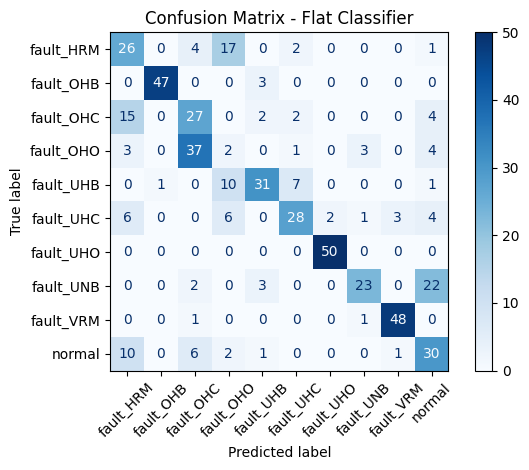

📋 Classification Report - Hierarchical Classifier:
              precision    recall  f1-score   support

   fault_HRM       0.28      0.32      0.30        50
   fault_OHB       0.88      0.70      0.78        50
   fault_OHC       0.27      0.24      0.26        50
   fault_OHO       0.15      0.10      0.12        50
   fault_UHB       0.70      0.70      0.70        50
   fault_UHC       0.60      0.56      0.58        50
   fault_UHO       0.98      1.00      0.99        50
   fault_UNB       0.84      0.54      0.66        50
   fault_VRM       0.89      0.96      0.92        50
      normal       0.48      0.88      0.62        50

    accuracy                           0.60       500
   macro avg       0.61      0.60      0.59       500
weighted avg       0.61      0.60      0.59       500



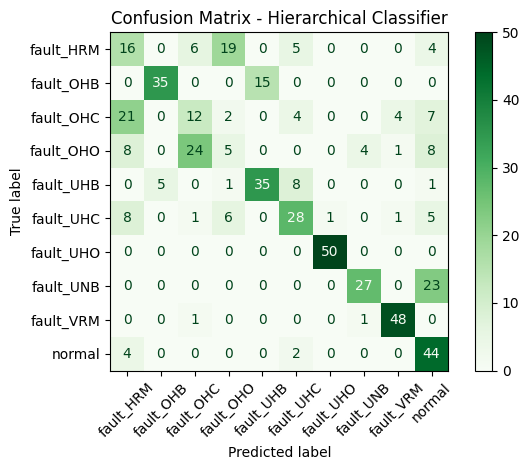

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# flat_result_df = flat_classifier_predict(final_df)
flat_y_true = flat_result_df['Label']
flat_y_pred = flat_result_df['FlatLabel']

hier_result_df = hierarchial_classifier(final_df[shared_top_features])
hier_y_true = final_df['Label']
hier_y_pred = hier_result_df['FinalLabel']
print("📋 Classification Report - Flat Classifier:")
print(classification_report(flat_y_true, flat_y_pred))

cm_flat = confusion_matrix(flat_y_true, flat_y_pred, labels=sorted(flat_y_true.unique()))
disp_flat = ConfusionMatrixDisplay(confusion_matrix=cm_flat, display_labels=sorted(flat_y_true.unique()))
disp_flat.plot(cmap='Blues')
plt.title("Confusion Matrix - Flat Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("📋 Classification Report - Hierarchical Classifier:")
print(classification_report(hier_y_true, hier_y_pred))

cm_hier = confusion_matrix(hier_y_true, hier_y_pred, labels=sorted(hier_y_true.unique()))
disp_hier = ConfusionMatrixDisplay(confusion_matrix=cm_hier, display_labels=sorted(hier_y_true.unique()))
disp_hier.plot(cmap='Greens')
plt.title("Confusion Matrix - Hierarchical Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def YATAGHAN(raw_sample_df):
    """
    Takes a raw DataFrame (one class sample, 8 columns), processes it, and reports prediction.
    """
    import pandas as pd
    from sklearn.metrics import classification_report

    # Step 1: Drop unnecessary columns (assume input has 8 columns)
    raw_sample_df = raw_sample_df.drop(columns=[0, 5, 7])

    # Step 2: Rename columns properly (now 6 columns: 5 signals + label)
    raw_sample_df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'label']

    # Step 3: Extract features using predefined function (with scaler)
    processed_df, _ = extract_features_for_inference(raw_sample_df)

    # Step 4: Run hierarchical classifier
    predicted_df = hierarchial_classifier(processed_df[shared_top_features])

    # Step 5: Compare prediction with true label
    predicted_label = predicted_df['FinalLabel'].iloc[0]
    actual_label = processed_df['Label'].iloc[0]

    # Step 6: Output result
    if predicted_label == actual_label:
        print(f"✅ The model correctly predicted the label: {predicted_label}")
    else:
        print(f"❌ The model predicted '{predicted_label}', but the true label was '{actual_label}'")

    return predicted_label, actual_label


In [ ]:
import gdown
import pandas as pd

# Step 1: Define the Google Drive file ID and label name (example: fault_UHB)
file_id = "1PxRg6y4-wpy9Ozb2F3ejrY4sJRfYIUFd"  # Replace this with the ID of the desired class
label_name = "fault_UHB"  # Class label corresponding to this file

# Step 2: Build the download URL
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "sample_data.csv"

# Step 3: Download the file from Google Drive
gdown.download(url, output_path, quiet=False)

# Step 4: Load the first 5000 rows of the file (assuming no header)
raw_input_df = pd.read_csv(output_path, header=None).iloc[:5000, :]

# Step 5: Add the label column at the end
raw_input_df[8] = label_name  # The label column will be used by the YATAGHAN function

# Step 6: Run the full classification pipeline
YATAGHAN(raw_input_df)


Downloading...
From: https://drive.google.com/uc?id=1PxRg6y4-wpy9Ozb2F3ejrY4sJRfYIUFd
To: /content/sample_data.csv
100%|██████████| 17.2M/17.2M [00:00<00:00, 67.4MB/s]


✅ Final feature DataFrame shape: (1, 13)
   Skewness_4  Kurtosis_3  Bandwidth_3    Peak_4    Mean_5  CrestFactor_5  \
0   -1.402266   -0.141035     -0.54312  1.801492 -0.125042       1.643646   

   Skewness_2  Skewness_3    Mean_2  SpectralFlatness_4  ResonantFreq_5  \
0    0.676293   -0.066504 -1.818021            -1.70631        0.959374   

   CrestFactor_3      Label  
0      -0.436497  fault_UHB  
✅ The model correctly predicted the label: fault_UHB


('fault_UHB', 'fault_UHB')

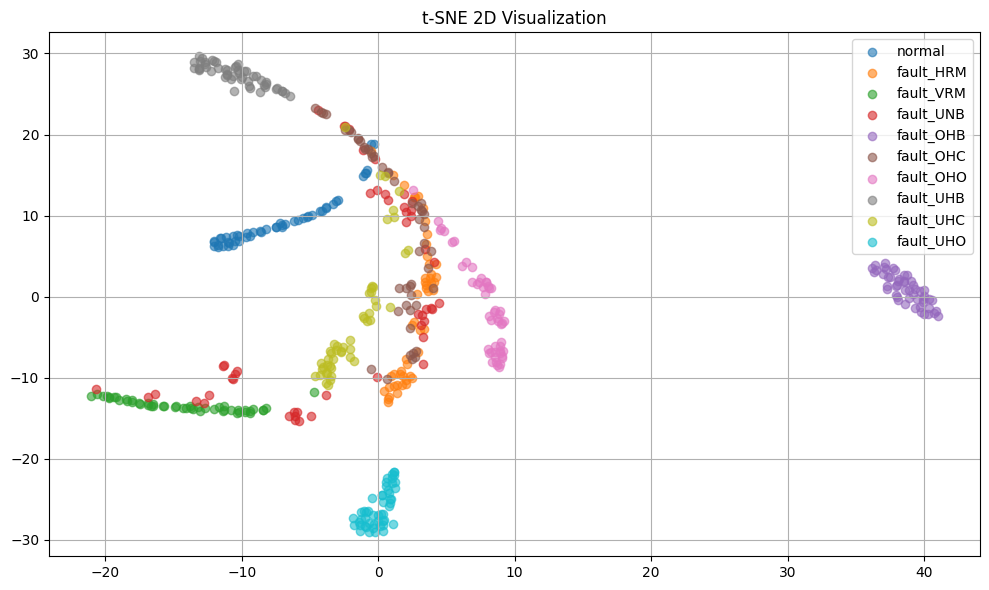

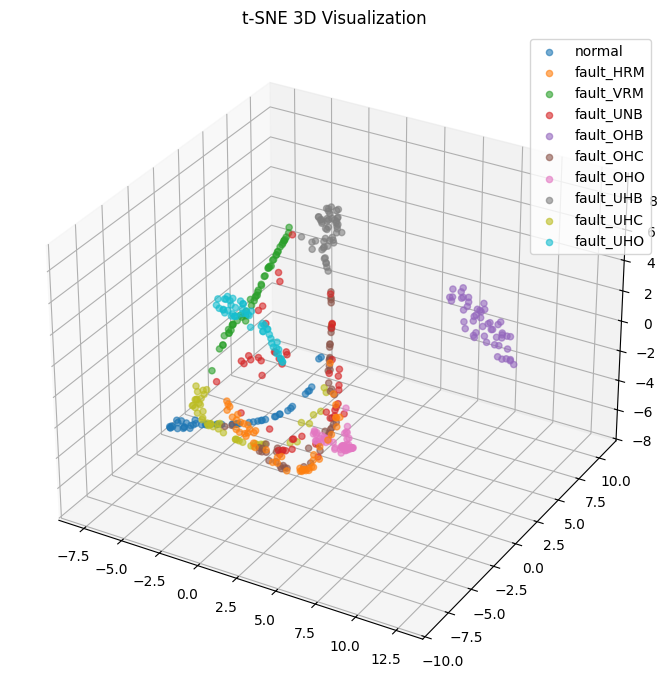

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Drop the label column for t-SNE
features_only = features_df.drop(columns=['Label'])
labels = features_df['Label']

# Apply t-SNE for 2D
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne_2d.fit_transform(features_only)

# Plot 2D t-SNE
plt.figure(figsize=(10, 6))
for label in pd.unique(labels):
    idx = labels == label
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=label, alpha=0.6)
plt.title("t-SNE 2D Visualization")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Apply t-SNE for 3D
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
features_3d = tsne_3d.fit_transform(features_only)

# Plot 3D t-SNE
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in pd.unique(labels):
    idx = labels == label
    ax.scatter(features_3d[idx, 0], features_3d[idx, 1], features_3d[idx, 2], label=label, alpha=0.6)
ax.set_title("t-SNE 3D Visualization")
ax.legend()
plt.tight_layout()
plt.show()
